In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mit-plagairism-detection-dataset/train_snli.txt


In [7]:
from collections import Counter

In [8]:
#Codes by Jay Lee https://www.kaggle.com/jayaos/basic-nlp-preprocessing-of-corpus-and-zipf-s-law/notebook

def read_docu(file):
    
    all_words = []
    
    with open(file, "r", encoding = "utf-8") as input_file:
        for line in input_file:
            line = line.lower()
            line = line.strip().split()
            all_words += line
        return(all_words)

In [9]:
#Codes by Jay Lee https://www.kaggle.com/jayaos/basic-nlp-preprocessing-of-corpus-and-zipf-s-law/notebook

def word_counter(all_words):
    
    word_count = Counter()
    for word in all_words:
        word_count[word] += 1
    return(word_count.values())

In [10]:
def draw_zipfian_curve(word_count):
    plt.plot(sorted(word_count, reverse = True), marker = "o")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("log(Rank)")
    plt.ylabel("log(Frequency)")
    plt.show()

In [11]:
#Codes by Jay Lee https://www.kaggle.com/jayaos/basic-nlp-preprocessing-of-corpus-and-zipf-s-law/notebook

def zipfian_plot(file):
    word_corpus = read_docu(file)
    counts = word_counter(word_corpus)
    draw_zipfian_curve(counts)

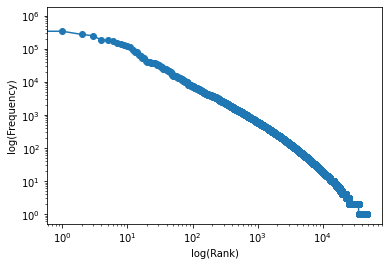

In [12]:
zipfian_plot("../input/mit-plagairism-detection-dataset/train_snli.txt")

In [13]:
df= pd.read_csv('../input/mit-plagairism-detection-dataset/train_snli.txt', sep='\t', error_bad_lines=False)                    
df.head()

,A person on a horse jumps over a broken down airplane.,"A person is at a diner, ordering an omelette.",0
0,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",1
1,Children smiling and waving at camera,There are children present,1
2,Children smiling and waving at camera,The kids are frowning,0
3,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,0
4,A boy is jumping on skateboard in the middle o...,The boy does a skateboarding trick.,1


In [ ]:
!pip install transformers datasets fasttext torch pandas numpy scikit-learn matplotlib seaborn tqdm sentencepiece